In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.cluster import KMeans

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('Advertising (1).csv')
advertising_df = pd.DataFrame(df)

Null values:
 Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64
Data types:
 Unnamed: 0      int64
TV            float64
Radio         float64
Newspaper     float64
Sales         float64
dtype: object


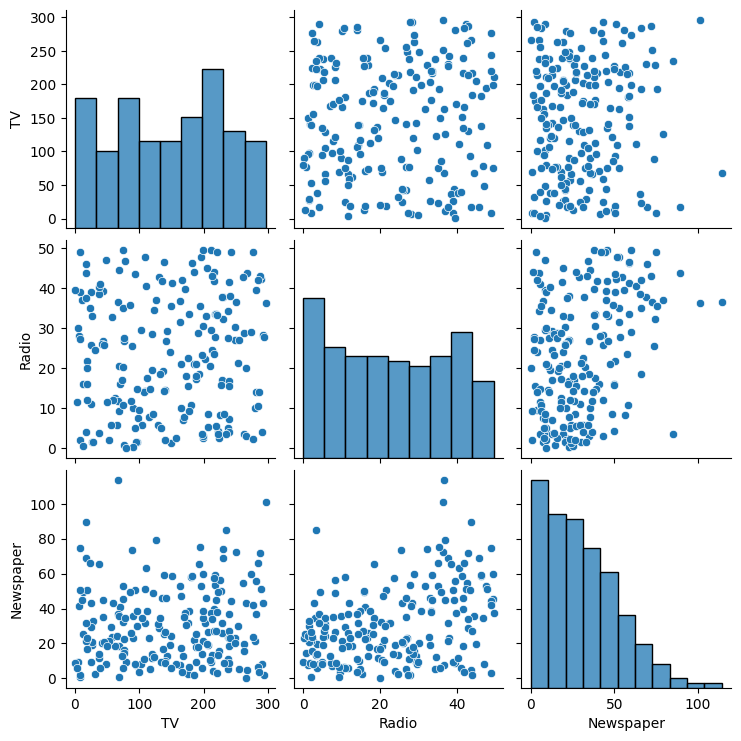

In [ ]:
print("Null values:\n", advertising_df.isnull().sum())
print("Data types:\n", advertising_df.dtypes)
features = advertising_df[['TV', 'Radio', 'Newspaper']]
target = advertising_df['Sales']
sns.pairplot(features)
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [ ]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)

In [ ]:
poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
poly_model.fit(X_train, y_train)
poly_predictions = poly_model.predict(X_test)

In [ ]:
svr_model = SVR(kernel='rbf')
svr_model.fit(X_train, y_train)
svr_predictions = svr_model.predict(X_test)

In [ ]:
lr_mae = mean_absolute_error(y_test, lr_predictions)
lr_mse = mean_squared_error(y_test, lr_predictions)
lr_rmse = np.sqrt(lr_mse)

poly_mae = mean_absolute_error(y_test, poly_predictions)
poly_mse = mean_squared_error(y_test, poly_predictions)
poly_rmse = np.sqrt(poly_mse)

svr_mae = mean_absolute_error(y_test, svr_predictions)
svr_mse = mean_squared_error(y_test, svr_predictions)
svr_rmse = np.sqrt(svr_mse)

In [ ]:
print("Linear Regression - MAE:", lr_mae, "MSE:", lr_mse, "RMSE:", lr_rmse)
print("Polynomial Regression - MAE:", poly_mae, "MSE:", poly_mse, "RMSE:", poly_rmse)
print("SVR - MAE:", svr_mae, "MSE:", svr_mse, "RMSE:", svr_rmse)

Linear Regression - MAE: 1.4607567168117603 MSE: 3.1740973539761033 RMSE: 1.78159966153345
Polynomial Regression - MAE: 0.5261794444043838 MSE: 0.41291022853790765 RMSE: 0.6425809120553673
SVR - MAE: 1.514357586594181 MSE: 4.00604540443217 RMSE: 2.0015107804936174


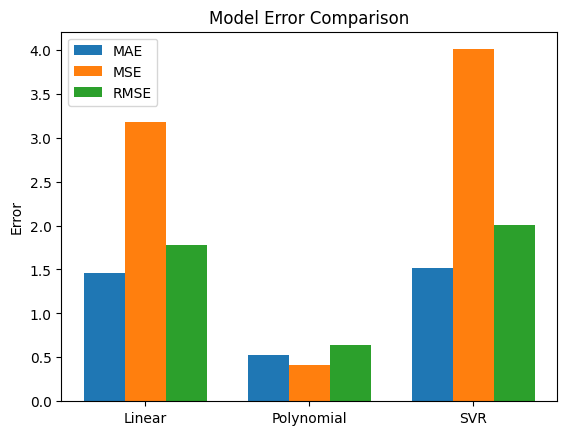

In [ ]:
model_names = ['Linear', 'Polynomial', 'SVR']
mae_values = [lr_mae, poly_mae, svr_mae]
mse_values = [lr_mse, poly_mse, svr_mse]
rmse_values = [lr_rmse, poly_rmse, svr_rmse]

x = np.arange(len(model_names))
width = 0.25

plt.bar(x - width, mae_values, width, label='MAE')
plt.bar(x, mse_values, width, label='MSE')
plt.bar(x + width, rmse_values, width, label='RMSE')
plt.xticks(x, model_names)
plt.ylabel("Error")
plt.title("Model Error Comparison")
plt.legend()
plt.show()

In [ ]:
kmeans_model = KMeans(n_clusters=3, random_state=42)
kmeans_model.fit(features)
clusters = kmeans_model.labels_

In [ ]:
advertising_df['Cluster'] = clusters

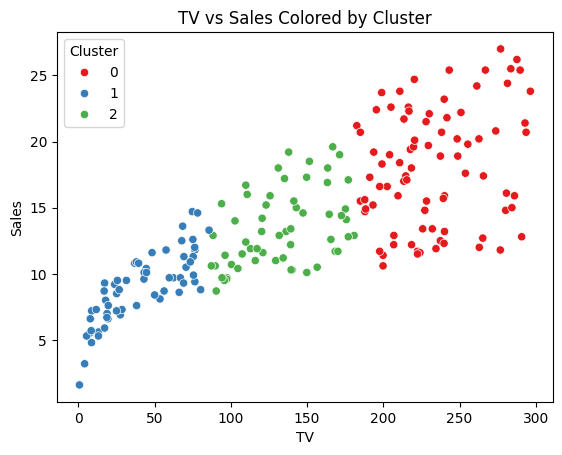

In [ ]:
sns.scatterplot(data=advertising_df, x='TV', y='Sales', hue='Cluster', palette='Set1')
plt.title("TV vs Sales Colored by Cluster")
plt.show()